<a href="https://colab.research.google.com/github/Soomro2023/uVXfZskFn7YQqprg/blob/main/Project__L2_uVXfZskFn7YQqprg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project 2**

#1. Exploratory Data Analysis (EDA)

###1.1. Import Data

In [1]:
import pandas as pd
from google.colab import files
upload = files.upload()

Saving term-deposit-marketing-2020.csv to term-deposit-marketing-2020 (1).csv


In [2]:
df_marketing = pd.read_csv('term-deposit-marketing-2020.csv')

###1.2. Data Analysis

In [3]:
# descring data
df_marketing.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


#### Separating numeric and categorical attributes

In [4]:
#  Separate numeric and categorical attributes
import numpy as np
numeric_data = df_marketing.select_dtypes(include=[np.number])
categorical_data = df_marketing.select_dtypes(exclude=[np.number])

print("Numeric data:", numeric_data.columns,"\n Numeric data column counts:",numeric_data.shape)
print("Categorical data:", categorical_data.columns,"\n Categorical data column counts:",categorical_data.shape)

Numeric data: Index(['age', 'balance', 'day', 'duration', 'campaign'], dtype='object') 
 Numeric data column counts: (40000, 5)
Categorical data: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'y'],
      dtype='object') 
 Categorical data column counts: (40000, 9)


There are 13 attributes in the data excluding target attribute "y". Among 13 attributes, 5 attributes are numeric and the rest are categorical.

In [5]:
# Describe the numeric data
numeric_data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [6]:
df_marketing.duplicated().sum() # check if there is any duplicated row in the data

0

In [7]:
df_marketing.isnull().sum() # check if there is any null value

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [8]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       40000 non-null  int64
 1   balance   40000 non-null  int64
 2   day       40000 non-null  int64
 3   duration  40000 non-null  int64
 4   campaign  40000 non-null  int64
dtypes: int64(5)
memory usage: 1.5 MB


###Since there is no duplicated rows, no null values and data types for numberic attributes are correct, we do not need further actions.

###1.3. Data Distribution

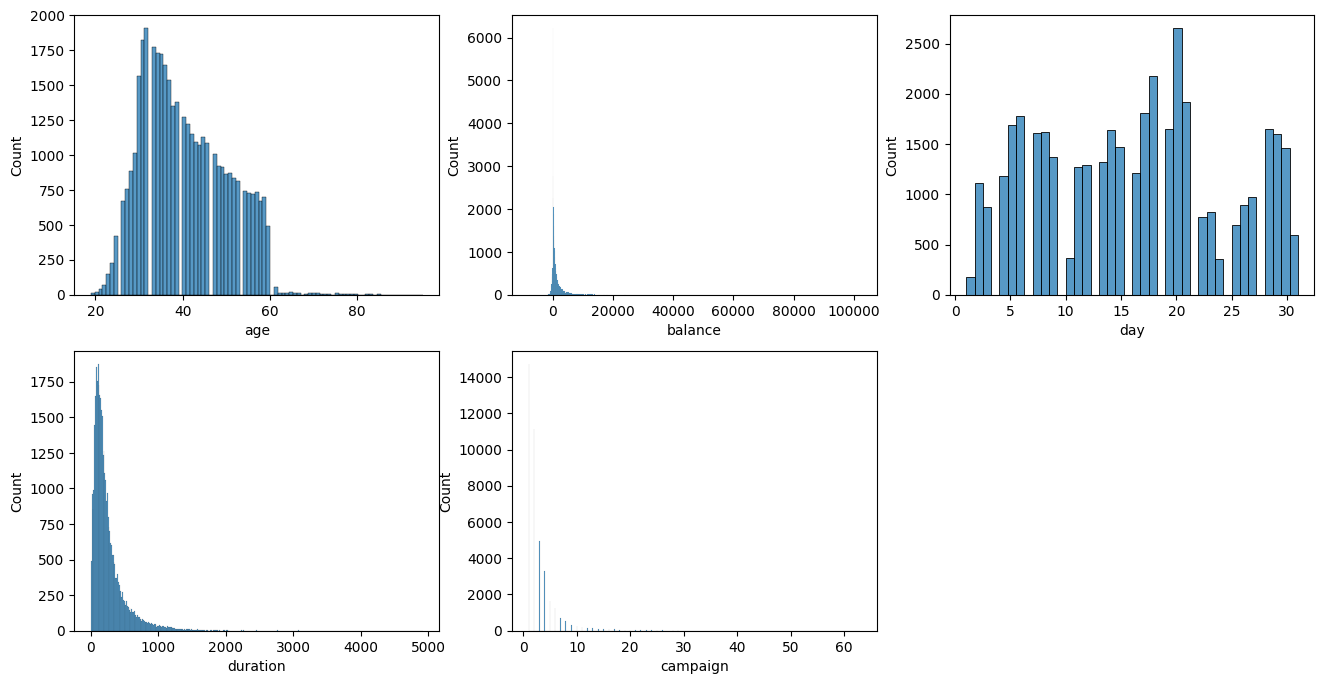

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df = numeric_data
fig = plt.figure(figsize = (16, 8))
i = 0
for column in df:
  sub = fig.add_subplot(2, 3, i + 1)
  sub.set_xlabel(column)
  sns.histplot(data = df, x = column)
  i = i + 1

## For categorical data, the frequency of each category is showns in the following plots:

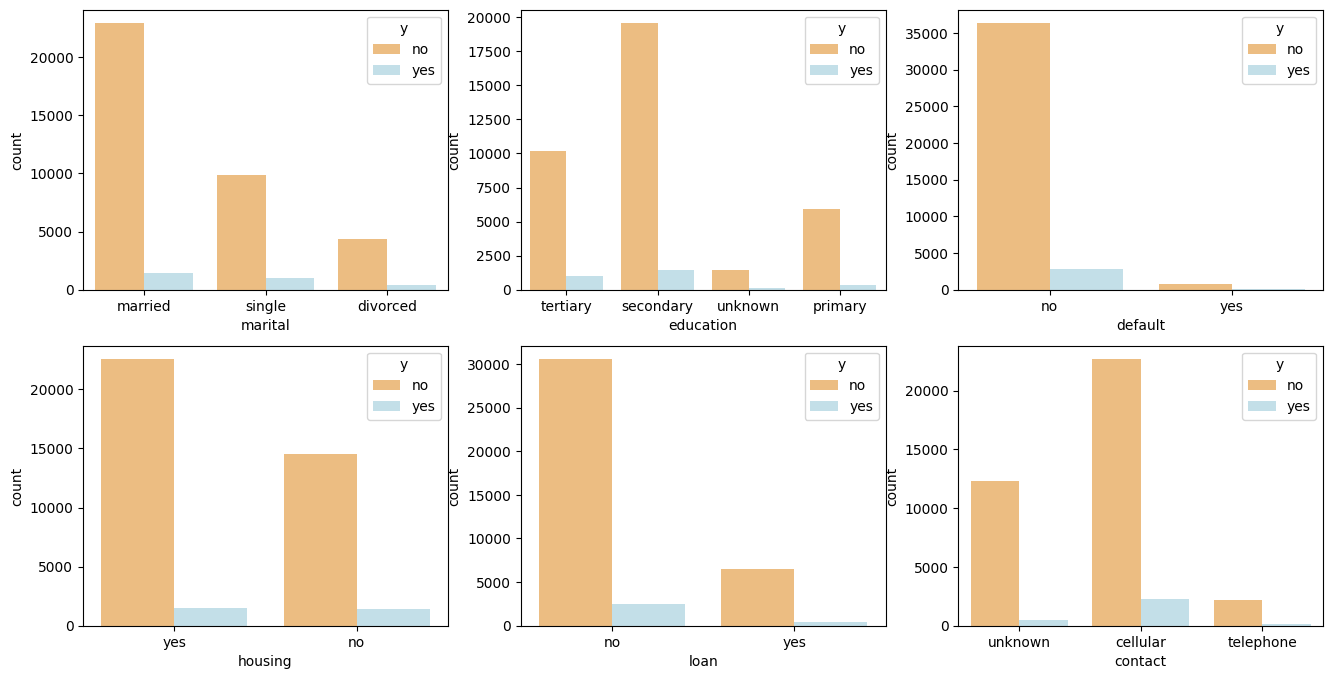

In [10]:
col  = list(categorical_data.columns)
cat_list = col[1:-2]
fig = plt.figure(figsize = (16, 8))
for i in range(len(cat_list)):
  column = cat_list[i]
  sub = fig.add_subplot(2, 3, i + 1)
  chart = sns.countplot(data = categorical_data, x = column, hue = 'y', palette= 'RdYlBu')

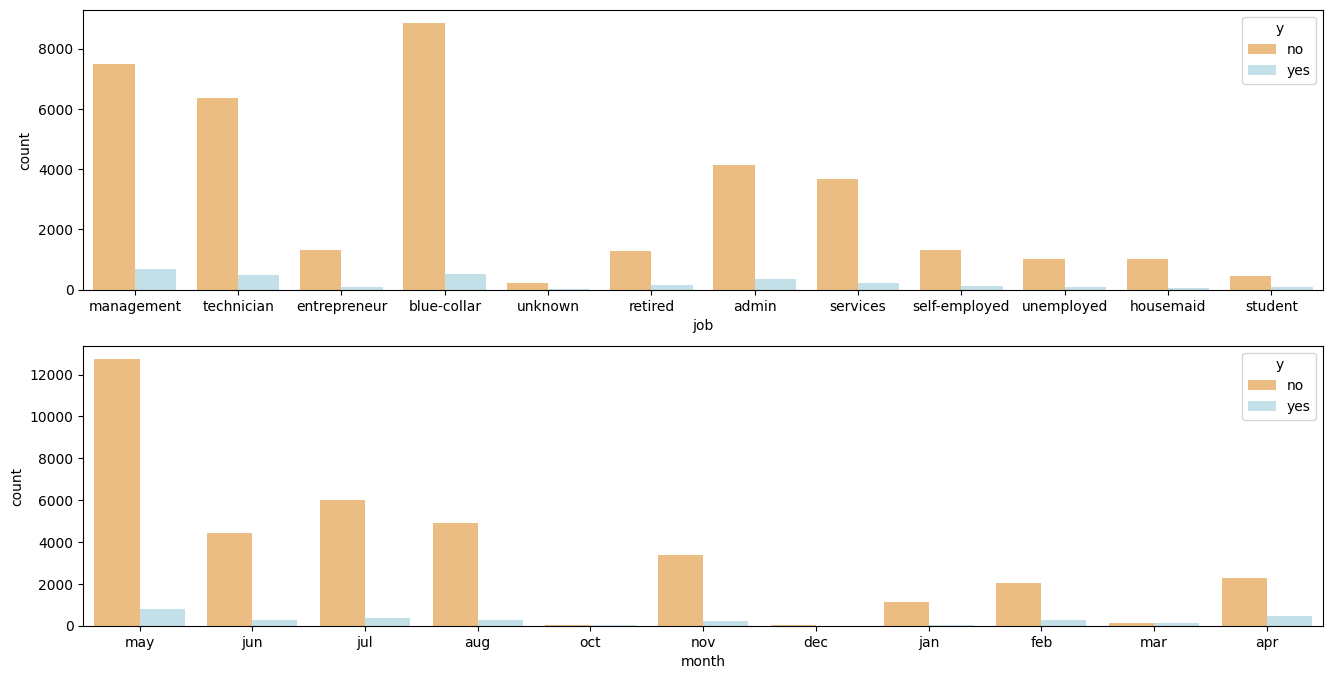

In [11]:
col  = list(categorical_data.columns)
cat_list = [col[0], col[7]]
fig = plt.figure(figsize = (16, 8))
for i in range(len(cat_list)):
  column = cat_list[i]
  sub = fig.add_subplot(2, 1, i + 1)
  chart = sns.countplot(data = categorical_data, x = column, hue = 'y', palette= 'RdYlBu')

###Looking at categorical plots, data distribution for each attribute is imbalanced.

# 2. Data Preprocessing

### Since we have two types of data: Numeric and categorical. We will normalize the numeric data and will perform binary enoding operation on the categorical data to transform it to numeric values. 

###2.1. Normalization

In [12]:
from sklearn import preprocessing
# normalizing numeric features 
min_max_scaler = preprocessing.MinMaxScaler()
normalized_numeric_feats = min_max_scaler.fit_transform(numeric_data)
normalized_numeric_feats = pd.DataFrame(normalized_numeric_feats, columns=numeric_data.columns)

###2.2. Binary Encoding

### To transform categorical data into binary values 0 and 1. For this purpose, I use one-hot coding or dummies encoding [Reference: https://tungmphung.com/how-to-convert-categorical-variables-to-numerical-variables/]

In [13]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import category_encoders as ce

cat_data = categorical_data.iloc[:,0:8]
encoder = ce.one_hot.OneHotEncoder(cols=cat_data.columns, return_df=True)
cat_data_encoded =encoder.fit_transform(cat_data) 

In [15]:
target_labels = categorical_data['y'].map(dict(yes = 1, no = 0))

marketing_sorted = pd.concat([normalized_numeric_feats, cat_data_encoded], axis = 1)

In [16]:
marketing_sorted

,age,balance,day,duration,campaign,job_1,job_2,job_3,job_4,job_5,...,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11
0,0.513158,0.092259,0.133333,0.053070,0.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.328947,0.073067,0.133333,0.030704,0.000000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.184211,0.072822,0.133333,0.015453,0.000000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.368421,0.086476,0.133333,0.018707,0.000000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.184211,0.072812,0.133333,0.040260,0.000000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.447368,0.076390,0.066667,0.021757,0.000000,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
39996,0.144737,0.103127,0.066667,0.048394,0.032258,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
39997,0.460526,0.074619,0.066667,0.034567,0.000000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
39998,0.197368,0.082309,0.066667,0.069540,0.000000,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


###2.3. Spliting the data into train and test data sets

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(marketing_sorted, target_labels, test_size=0.2)

###2.4. Resampling for making balanced training data

0    29638
1     2362
Name: y, dtype: int64


<Axes: ylabel='Type'>

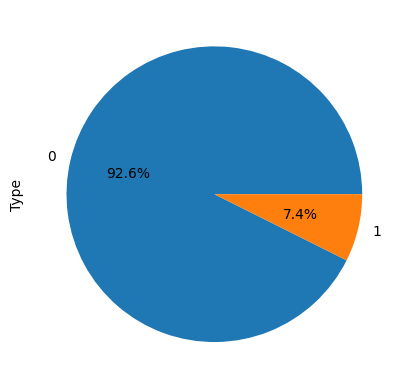

In [18]:
import seaborn as sns
train = pd.concat([X_train,y_train],axis=1)

print(train['y'].value_counts())
palette_color = sns.color_palette('bright')

# plotting data on chart
# # plt.pie(train['y'], labels=train['y'].columns, colors=palette_color, autopct='%.0f%%')
  
# # displaying chart
# plt.show()
train.groupby('y').size().plot(kind='pie',
                                       y = "y",
                                       label = "Type",
                                       autopct='%1.1f%%')

#### Pie chart depicts imbalance target distribution

In [19]:
client_not_sub = train[target_labels==0]
client_sub = train[target_labels==1]

print(client_not_sub.shape)
print(client_sub.shape)

(29638, 45)
(2362, 45)


<ipython-input-19-fc7727f88b0b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  client_not_sub = train[target_labels==0]
<ipython-input-19-fc7727f88b0b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  client_sub = train[target_labels==1]


In [20]:
import math
from sklearn.utils import resample
total_sample_len = len(train)
client_not_sub = resample(client_not_sub,
                             replace=True,
                             n_samples=math.ceil(total_sample_len*0.50),
                             random_state=42)

client_sub = resample(client_sub,
                             replace=True,
                             n_samples=math.ceil(total_sample_len*0.50),
                             random_state=42)

print(client_not_sub.shape)
print(client_sub.shape)

(16000, 45)
(16000, 45)


0    16000
1    16000
Name: y, dtype: int64


<Axes: ylabel='Type'>

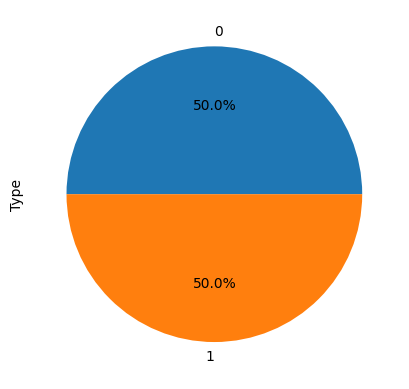

In [21]:
train_resampled = pd.concat([client_not_sub, client_sub],axis=0)
X_train = train.drop('y',axis=1)
y_train = train["y"]

print(train_resampled['y'].value_counts())
train_resampled.groupby('y').size().plot(kind='pie',
                                               y = "y",
                                               label = "Type",
                                               autopct='%1.1f%%')

# 3. Predictive Model

###3.1. Selection of the best model with their appropriate hyperparameters using 'GridSearchCV'.

In [22]:

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import NearestNeighbors
import lightgbm as lgb
# clf = lgb.LGBMClassifier()
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier


model_params = {
    'SVM': {
        'model': svm.LinearSVC(),
        'params': {
            'C': [1, 2, 5, 10],
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10],
            'max_iter' : [100, 1000, 2000]
        }
    },

    'LGBM' : {
        'model' : lgb.LGBMClassifier(objective = 'binary', metric = 'accuracy_score', num_iterations = 100),
        'params' : {
                    'num_leaves': [10,100, 150],
                    'n_estimators': [10, 100],
                    # 'num_iterations': [100, 200, 300],
                    'learning_rate': [0.1, 0.5, 1]
    }
    },

    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,20,30]
        }
    },
    'XGBboost' : {
        'model' : XGBClassifier(),
        'params' : {
            'max_depth' : [2,13,30]
        }
    },
    'Artificial NeuralNetworks' : {
        'model' : MLPClassifier(),
        'params' : {
            'hidden_layer_sizes' :[(15,1),(5,2),(15,3)]
        }
    }
}

In [23]:
import warnings
warnings.filterwarnings("ignore")

scores = []

from sklearn.model_selection import GridSearchCV

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, scoring='f1_macro', return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [24]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,SVM,0.639568,{'C': 10}
1,logistic_regression,0.677011,"{'C': 10, 'max_iter': 100}"
2,LGBM,0.732711,"{'learning_rate': 0.1, 'n_estimators': 10, 'nu..."
3,random_forest,0.692452,{'n_estimators': 5}
4,XGBboost,0.729194,{'max_depth': 13}
5,Artificial NeuralNetworks,0.727979,"{'hidden_layer_sizes': (15, 3)}"


#### Among five predictive models Light GBM (LGBM) has the highest accuracy score for 5-fold cross-validation, followed by Xboost and Artificial Neural Networks (ANN). I will use these two models, LGBM and ANN using their best parameters. 


# Starting with LGBM

In [25]:
model = lgb.LGBMClassifier(objective = 'binary', metric = 'accuracy_score', n_estimators = 10, num_leaves = 10, num_iterations = 100, 
                           learning_rate = 0.1)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

Train accuracy 0.94428125
Test accuracy 0.943
Test F2 0.7005110674054273
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7466
           1       0.61      0.39      0.48       534

    accuracy                           0.94      8000
   macro avg       0.79      0.69      0.72      8000
weighted avg       0.93      0.94      0.94      8000



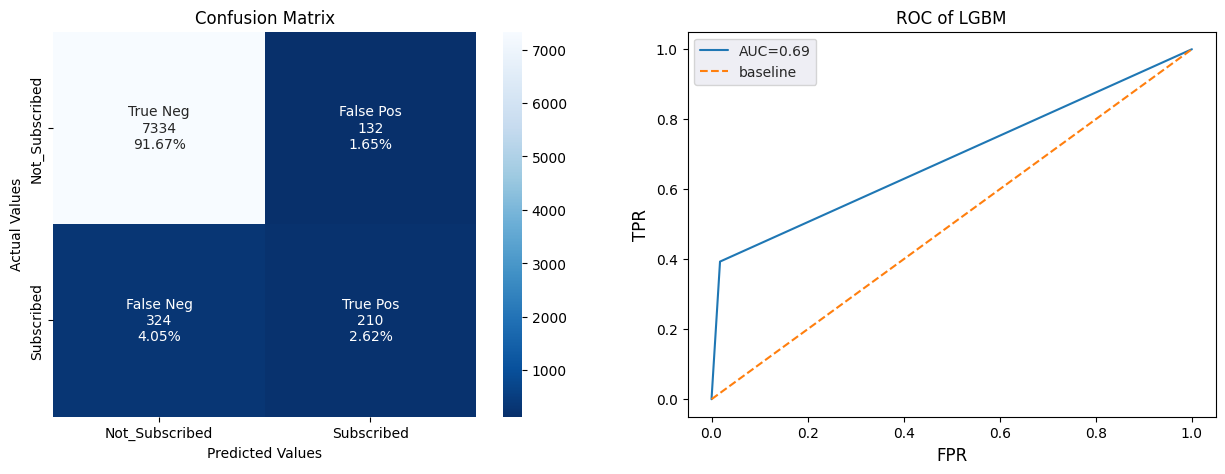

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
print('Train accuracy' ,accuracy_score(y_train,y_train_predict))
print('Test accuracy' ,accuracy_score(y_test,y_predict))

from sklearn.metrics import fbeta_score
print('Test F2', fbeta_score(y_test, y_predict, average='macro', beta=2))

print(classification_report(y_test,y_predict))

#AUC
fpr, tpr, _threshold = metrics.roc_curve(y_test, y_predict)
auc_LGBM = round(metrics.auc(fpr, tpr), 2)

# confusion matrix
cm = confusion_matrix(y_test, y_predict)

 #plot confusion matrix and ROC 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
categories = ['Not_Subscribed', 'Subscribed']
cm_plot = sns.heatmap(cm, annot = labels, fmt='', cmap = 'Blues_r', xticklabels=categories,yticklabels=categories, ax = ax1)
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')
cm_plot.set_title ('Confusion Matrix')

sns.set(style='darkgrid')
ax2.plot(fpr, tpr, label="AUC="+str(auc_LGBM))
ax2.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('ROC of LGBM', fontsize=12)
plt.ylabel('TPR', fontsize=12)
plt.xlabel('FPR', fontsize=12)
plt.legend(fontsize=10);

In [27]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, marketing_sorted, target_labels, cv=kfold)
print('Cross Validation Score' , cv_scores)
print('Average CV Score' , np.average(cv_scores))

Cross Validation Score [0.943125 0.94275  0.938    0.9365   0.937375]
Average CV Score 0.93955


#### Average CV score for LGBM is 0.93955. 

###3.1. SHAP analysis for explaining LGBM model and determining the important features. 

In [28]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


  0%|          | 0/25 [00:00<?, ?it/s]

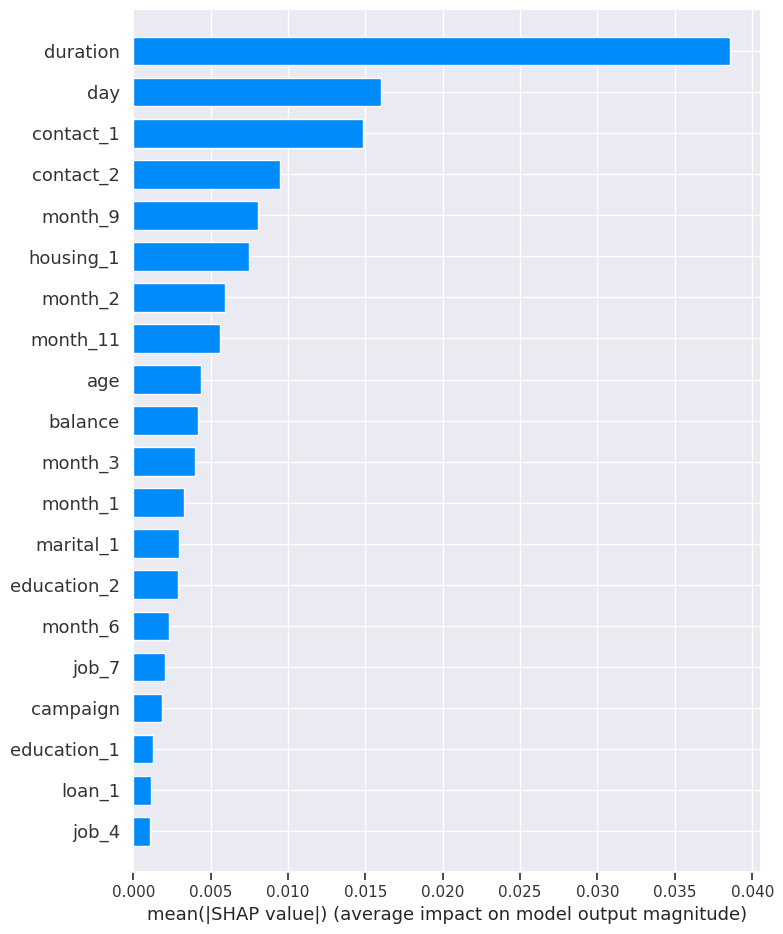

In [29]:
import warnings
warnings.filterwarnings("ignore")

import shap
shap.initjs()
shap_sample_train = shap.sample(X_train) 
shap_sample_test = shap.sample(X_test, 25) 
explainer = shap.KernelExplainer(model.predict, shap_sample_train)
shap_values_test = explainer.shap_values(shap_sample_test)

shap.summary_plot(shap_values_test,shap_sample_test, plot_type="bar")

### SHAP analysis shows that 'duration', is the most important feature followed by 'day', and 'contact_1' important features.


# To train LGBM model using the most important features:

In [30]:
X_train_new = X_train[['day', 'duration', 'contact_1']]
X_test_new = X_test[['day', 'duration', 'contact_1']]


Train accuracy 0.93509375
Test accuracy 0.938125
Test F2 0.6410568311674054
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7466
           1       0.58      0.27      0.37       534

    accuracy                           0.94      8000
   macro avg       0.76      0.63      0.67      8000
weighted avg       0.92      0.94      0.93      8000



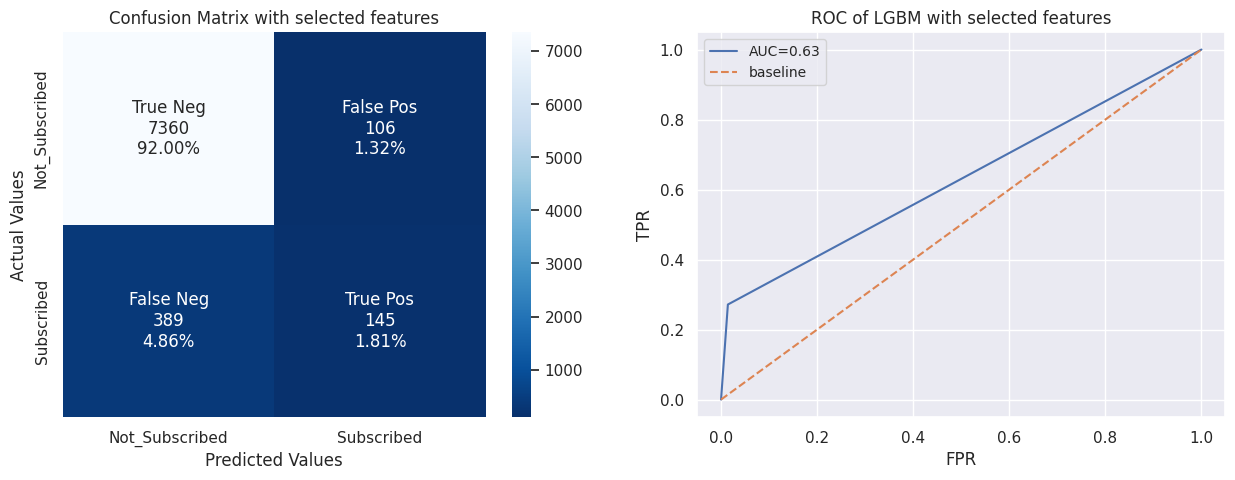

In [31]:
import warnings
warnings.filterwarnings("ignore")

model_new = lgb.LGBMClassifier(objective = 'binary', metric = 'accuracy_score', n_estimators = 10, num_leaves = 10, num_iterations = 100, 
                           learning_rate = 0.1)
model_new.fit(X_train_new,y_train)
y_predict_new = model_new.predict(X_test_new)
y_train_predict_new = model_new.predict(X_train_new)

print('Train accuracy' ,accuracy_score(y_train,y_train_predict_new))
print('Test accuracy' ,accuracy_score(y_test,y_predict_new))

print('Test F2' ,fbeta_score(y_test, y_predict_new, average='macro', beta=2))

print(classification_report(y_test,y_predict_new))
# pd.crosstab(y_test,y_predict)

#AUC
fpr, tpr, _threshold = metrics.roc_curve(y_test, y_predict_new)
auc_LGBM = round(metrics.auc(fpr, tpr), 2)

#confusion matrix
cm = confusion_matrix(y_test, y_predict_new)

  #plot confusion matrix and ROC 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
categories = ['Not_Subscribed', 'Subscribed']
cm_plot = sns.heatmap(cm, annot = labels, fmt='', cmap = 'Blues_r', xticklabels=categories,yticklabels=categories, ax = ax1)
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')
cm_plot.set_title ('Confusion Matrix with selected features')

sns.set(style='darkgrid')
ax2.plot(fpr, tpr, label="AUC="+str(auc_LGBM))
ax2.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('ROC of LGBM with selected features', fontsize=12)
plt.ylabel('TPR', fontsize=12)
plt.xlabel('FPR', fontsize=12)
plt.legend(fontsize=10);


In [32]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model_new, marketing_sorted, target_labels, cv=kfold)
print('Cross Validation Score:' , cv_scores)
print('Average CV Score:' , np.average(cv_scores))

Cross Validation Score: [0.943125 0.94275  0.938    0.9365   0.937375]
Average CV Score: 0.93955


### Average CV score = 0.93955 shows that LGBM model's performance has no effect using only these three importance features. 

# Artificial Neural Networks (ANN)

Train accuracy 0.9398125
Test accuracy 0.94125
Test F2 0.6657202529793657
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7466
           1       0.62      0.32      0.42       534

    accuracy                           0.94      8000
   macro avg       0.78      0.65      0.69      8000
weighted avg       0.93      0.94      0.93      8000



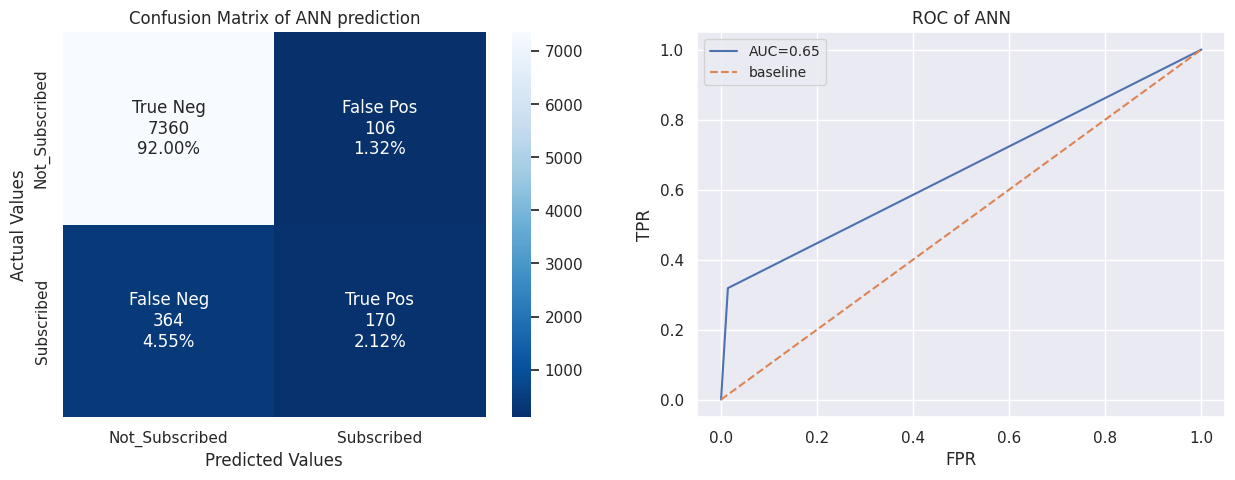

In [33]:
ANN = MLPClassifier(hidden_layer_sizes=(15, 3), 
                      random_state=1)
ANN.fit(X_train,y_train)
y_predict_ANN = ANN.predict(X_test)
y_train_predict_ANN = ANN.predict(X_train)

print('Train accuracy' ,accuracy_score(y_train,y_train_predict_ANN))
print('Test accuracy' ,accuracy_score(y_test,y_predict_ANN))
print('Test F2' ,fbeta_score(y_test, y_predict_ANN, average='macro', beta=2))

print(classification_report(y_test,y_predict_ANN))
# pd.crosstab(y_test,y_predict_ANN)

#AUC
fpr, tpr, _threshold = metrics.roc_curve(y_test, y_predict_ANN)
auc_ANN = round(metrics.auc(fpr, tpr), 2)

#confusion matrix
cm_ANN = confusion_matrix(y_test, y_predict_ANN)

  #plot confusion matrix and ROC 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_ANN.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_ANN.flatten()/np.sum(cm_ANN)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
categories = ['Not_Subscribed', 'Subscribed']
cm_plot = sns.heatmap(cm_ANN, annot = labels, fmt='', cmap = 'Blues_r', xticklabels=categories,yticklabels=categories, ax = ax1)
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')
cm_plot.set_title ('Confusion Matrix of ANN prediction')

sns.set(style='darkgrid')
ax2.plot(fpr, tpr, label="AUC="+str(auc_ANN))
ax2.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('ROC of ANN', fontsize=12)
plt.ylabel('TPR', fontsize=12)
plt.xlabel('FPR', fontsize=12)
plt.legend(fontsize=10);


In [34]:
# from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# from sklearn.model_selection import cross_val_score
cv_scores_ANN = cross_val_score(ANN, marketing_sorted, target_labels, cv=kfold)
print('Cross Validation Score:' , cv_scores_ANN)
print('Average CV Score:' , np.average(cv_scores_ANN))

Cross Validation Score: [0.937375 0.941125 0.934375 0.93625  0.935875]
Average CV Score: 0.937


###3.2. SHAP Analysis for ANN

  0%|          | 0/25 [00:00<?, ?it/s]

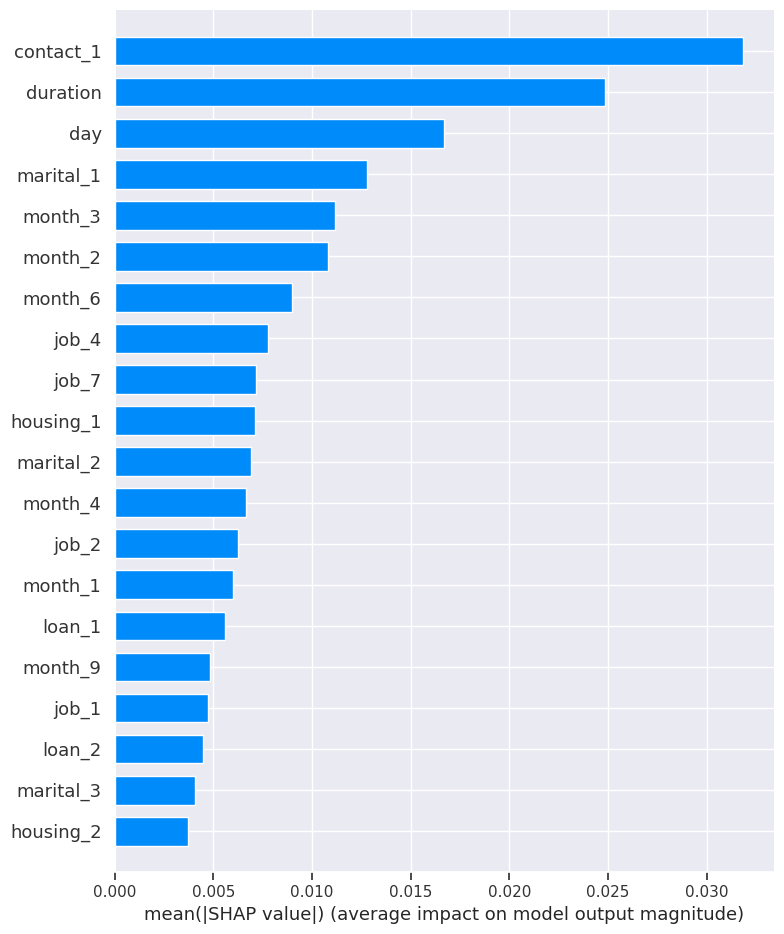

In [35]:
shap.initjs()
shap_sample_train = shap.sample(X_train) 
shap_sample_test = shap.sample(X_test, 25) 
explainer = shap.KernelExplainer(ANN.predict, shap_sample_train)
shap_values_test = explainer.shap_values(shap_sample_test)

shap.summary_plot(shap_values_test,shap_sample_test, plot_type="bar")

# To train ANN model using the most important features:

Train accuracy 0.93228125
Test accuracy 0.937125
Test F2 0.6366016066141195
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7466
           1       0.56      0.26      0.36       534

    accuracy                           0.94      8000
   macro avg       0.76      0.62      0.66      8000
weighted avg       0.92      0.94      0.93      8000



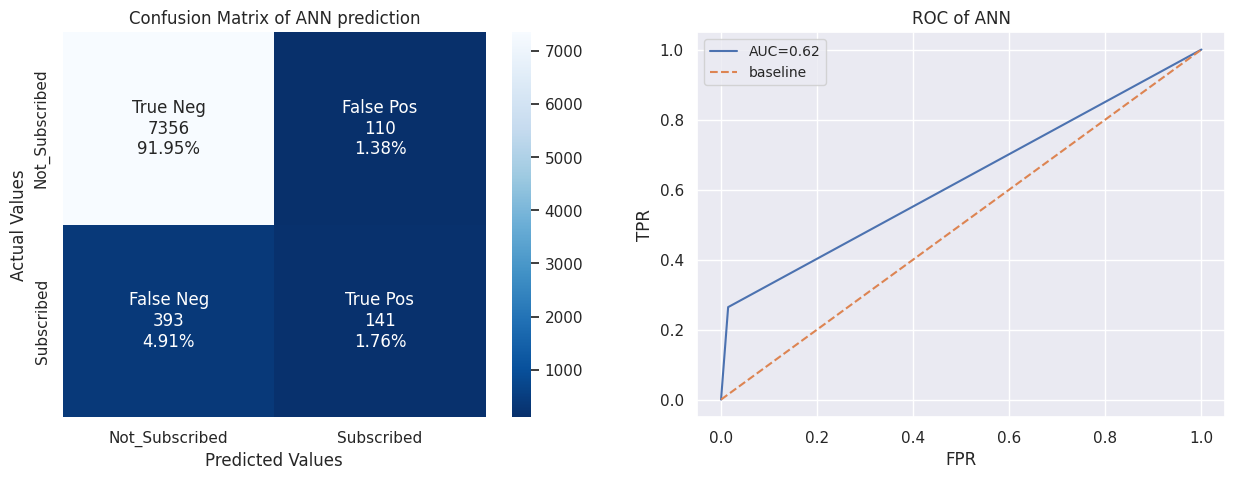

In [36]:
ANN_new = MLPClassifier(hidden_layer_sizes=(15, 3), 
                      random_state=1)
ANN_new.fit(X_train_new,y_train)
y_predict_ANN_new = ANN_new.predict(X_test_new)
y_train_predict_ANN_new = ANN_new.predict(X_train_new)

print('Train accuracy' ,accuracy_score(y_train,y_train_predict_ANN_new))
print('Test accuracy' ,accuracy_score(y_test,y_predict_ANN_new))
print('Test F2' ,fbeta_score(y_test, y_predict_ANN_new, average='macro', beta=2))

print(classification_report(y_test,y_predict_ANN_new))
# pd.crosstab(y_test,y_predict_ANN)

#AUC
fpr, tpr, _threshold = metrics.roc_curve(y_test, y_predict_ANN_new)
auc_ANN = round(metrics.auc(fpr, tpr), 2)

#confusion matrix
cm_ANN = confusion_matrix(y_test, y_predict_ANN_new)

  #plot confusion matrix and ROC 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_ANN.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_ANN.flatten()/np.sum(cm_ANN)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
categories = ['Not_Subscribed', 'Subscribed']
cm_plot = sns.heatmap(cm_ANN, annot = labels, fmt='', cmap = 'Blues_r', xticklabels=categories,yticklabels=categories, ax = ax1)
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')
cm_plot.set_title ('Confusion Matrix of ANN prediction')

sns.set(style='darkgrid')
ax2.plot(fpr, tpr, label="AUC="+str(auc_ANN))
ax2.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('ROC of ANN', fontsize=12)
plt.ylabel('TPR', fontsize=12)
plt.xlabel('FPR', fontsize=12)
plt.legend(fontsize=10);


In [37]:
# from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# from sklearn.model_selection import cross_val_score
cv_scores_ANN_new = cross_val_score(ANN_new, marketing_sorted, target_labels, cv=kfold)
print('Cross Validation Score:' , cv_scores_ANN_new)
print('Average CV Score:' , np.average(cv_scores_ANN_new))

Cross Validation Score: [0.937375 0.941125 0.934375 0.93625  0.935875]
Average CV Score: 0.937


### Average CV score = 0.937 shows that ANN model's performance has no effect using only these three importance features. 

#Summary

In this project, I explored two machine learning models: 1. LGBM and ANN. Prediction accuracies and AUCs for LGBM and ANN models were (acc = 0.943; AUC = 0.69), and (acc = 0.941; AUC = 0.65), respectively. I incorporated SHAP analysis to explain the model and ranking the important features, which demonstrates that last contact duration is the most important attribute for determining whether the client will subscribe to a term deposit. Other most important attributes are the contact communication type and last contact day of the month. 

ML models were retrained using these three important attributes for verifying models' performance. LGBM and ANN models yield prediction accuracies and AUCs after using the importance three features as, (acc = 0.938; AUC = 0.63), and (acc = 0.937; AUC = 0.62), respectively. It shows that models have no difference in performance using these three features. 
